# Feedforward propagation in code

In [1]:
import numpy as np

def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = 1 / (1+np.exp(-pre_hidden))
    pre_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(pre_out - outputs))
    return mean_squared_error

In [2]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [3]:
def ReLU(x):
    return np.where(x>0, x, 0)

In [4]:
def linear(x):
    return x

In [10]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [6]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [16]:
softmax([1.9, 0.25])

array([0.83889105, 0.16110895])

In [11]:
def mse(p, y):
    return np.mean(np.square(p - y))

In [18]:
def mae(p, y):
    return np.mean(np.abs(p - y))

In [19]:
def binary_cross_entropy(p, y):
    return -np.mean(np.sum(y*np.log(p) + (1-y)*np.log(1-p)))

In [20]:
def categorical_cross_entropy(p, y):
    return -np.mean(np.sum(y*np.log(p)))

In [21]:
# Gradient Descent from scratch

import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

x = np.array([[1,1]])
y = np.array([[0]])

In [13]:
from copy import deepcopy
import numpy as np

def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = sigmoid(pre_hidden)
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = mse(pred_out, outputs)
    return mean_squared_error

In [8]:
def update_weights(inputs, outputs, weights, lr):
    
    original_weights = deepcopy(weights) 
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    
    original_loss = feed_forward(inputs, outputs, original_weights)
    
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            
            grad = (_loss_plus - original_loss) / (0.0001)
            
            updated_weights[i][index] = updated_weights[i][index] - grad*lr
            
    return updated_weights, original_loss

In [1]:
# Backpropagation using Chain-Rule

from copy import deepcopy
import numpy as np

x = np.array([[1,1]])
y = np.array([[0]])

In [5]:
W = [np.array([[-0.0053, 0.3793],
               [-0.5820, -0.5204],
               [-0.2723, 0.1896]], dtype=np.float32).T,
     np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
     np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
     np.array([-0.5516], dtype=np.float32)
     ]

In [3]:
W[0]

array([[-0.0053, -0.582 , -0.2723],
       [ 0.3793, -0.5204,  0.1896]], dtype=float32)

In [4]:
W[1]

array([-0.014 ,  0.5607, -0.0628], dtype=float32)

In [5]:
W[2]

array([[ 0.1528],
       [-0.1745],
       [-0.1135]], dtype=float32)

In [6]:
W[3]

array([-0.5516], dtype=float32)

In [14]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)

In [15]:
losses

[0.33455008989960927,
 0.31207511631926566,
 0.2911120956789758,
 0.2715584285618008,
 0.25331865368289397,
 0.23630390535663506,
 0.22043418057939854,
 0.20562934393762614,
 0.19181767195565072,
 0.17893238381869275,
 0.16691118681233832,
 0.1556960598895045,
 0.14523290882197154,
 0.13547129821318538,
 0.126364203525363,
 0.1178677719072326,
 0.10994110911041786,
 0.10254605271268186,
 0.09564699296836097,
 0.08921074608186348,
 0.08320634138085492,
 0.07760503878539614,
 0.07237968732031032,
 0.06750512536909528,
 0.06295786147683874,
 0.05871598599232297,
 0.05475906776322453,
 0.05106800838977991,
 0.04762501204639483,
 0.044413471300763355,
 0.041417873698660075,
 0.038623745036919385,
 0.0360175776318961,
 0.03358678180085144,
 0.03131958990014603,
 0.02920503167868223,
 0.027232868364629497,
 0.025393544746915474,
 0.023678132739303314,
 0.02207831742340097,
 0.020586339162646575,
 0.019194946055743803,
 0.017897382446392742,
 0.016687334455882247,
 0.015558921892945698,
 0.014

Text(0, 0.5, 'Loss value')

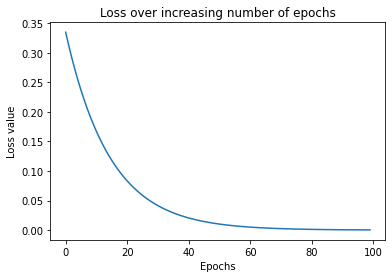

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

In [17]:
print(W)

[array([[ 0.01424004, -0.5907864 , -0.27549535],
       [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32), array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32), array([[ 0.3475135 ],
       [-0.05529078],
       [ 0.03760847]], dtype=float32), array([-0.22443289], dtype=float32)]


In [21]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = sigmoid(pre_hidden)
pred_out = np.dot(hidden, W[2]) + W[3]
print(pred_out)

[[-0.0174781]]


In [1]:
# Imapct of Learning Rate

x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

In [3]:
print(y)

[[3], [6], [9], [12]]


In [9]:
from copy import deepcopy
import numpy as np

def feed_forward(inputs, outputs, weights):
    pred_out = np.dot(inputs, weights[0]) + weights[1]
    mean_squared_error = np.mean(np.square(outputs - pred_out))
    return mean_squared_error

In [6]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] = temp_weights[i][index] + 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss) / 0.0001
            updated_weights[i][index] = updated_weights[i][index] - grad*lr
    return updated_weights

In [7]:
W = [np.array([[0]], dtype=np.float32),
np.array([[0]], dtype=np.float32)]

In [11]:
weight_values = []
for epx in range(1000):
    W = update_weights(x, y, W, 0.01)
    weight_values.append(W[0][0][0])

Text(0, 0.5, 'Weight Value')

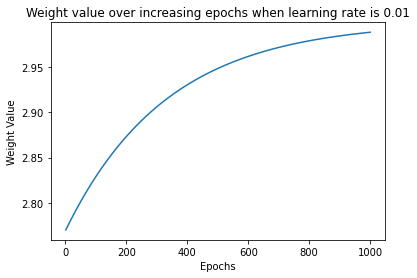

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, 1001)
plt.plot(epochs, weight_values)
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')

In [13]:
weight_values = []
for epx in range(1000):
    W = update_weights(x, y, W, 0.1)
    weight_values.append(W[0][0][0])

Text(0, 0.5, 'Weight Value')

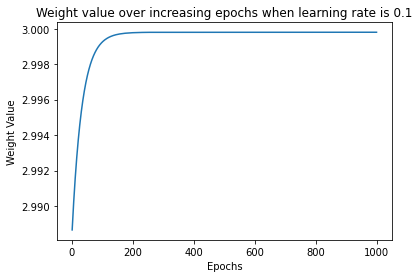

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, 1001)
plt.plot(epochs, weight_values)
plt.title('Weight value over increasing epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')

In [16]:
weight_values = []
for epx in range(1000):
    W = update_weights(x, y, W, 1)
    weight_values.append(W[0][0][0])

Text(0, 0.5, 'Weight Value')

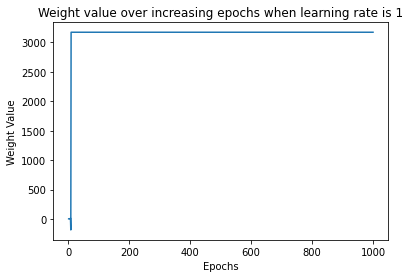

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, 1001)
plt.plot(epochs, weight_values)
plt.title('Weight value over increasing epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')

In [18]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss) / 0.0001
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', \
                      np.round(original_weights[i][index],2), \
                      'original loss:', np.round(org_loss,2), \
                      'loss_plus:', np.round(_loss_plus,2), \
                      'gradient:', np.round(grad,2), \
                      'updated_weights:', \
                      np.round(updated_weights[i][index],2))
    return updated_weights

In [19]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27
[array([[2.265477]], dtype=float32), array([[0.7404298]], 

Text(0, 0.5, 'Weight value')

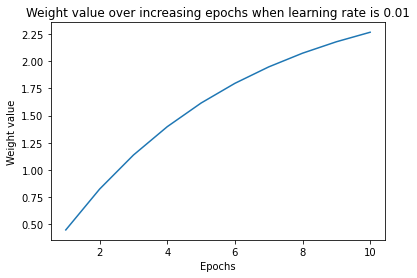

In [20]:
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])
print(W)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: 2.27 original loss: 1.88 loss_plus: 1.87 gradient: -7.31 updated_weights: 3.0
weight value: 3.0 original loss: 0.9 loss_plus: 0.9 gradient: 4.74 updated_weights: 2.52
weight value: 2.52 original loss: 0.46 loss_plus: 0.46 gradient: -3.31 updated_weights: 2.85
weight value: 2.85 original loss: 0.27 loss_plus: 0.27 gradient: 2.07 updated_weights: 2.65
weight value: 2.65 original loss: 0.17 loss_plus: 0.17 gradient: -1.52 updated_weights: 2.8
weight value: 2.8 original loss: 0.13 loss_plus: 0.13 gradient: 0.89 updated_weights: 2.71
weight value: 2.71 original loss: 0.11 loss_plus: 0.11 gradient: -0.72 updated_weights: 2.78
weight value: 2.78 original loss: 0.09 loss_plus: 0.09 gradient: 0.36 updated_weights: 2.75
weight value: 2.75 original loss: 0.08 loss_plus: 0.08 gradient: -0.36 updated_weights: 2.78
weight value: 2.78 original loss: 0.08 loss_plus: 0.08 gradient: 0.12 updated_weights: 2.77
[array([[2.7694018]], dtype=float32), array([[0.65252185]], dtype=float32)]


Text(0, 0.5, 'Weight value')

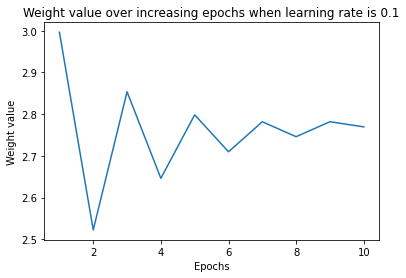

In [21]:
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
print(W)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: 2.77 original loss: 0.07 loss_plus: 0.07 gradient: -0.2 updated_weights: 2.96
weight value: 2.96 original loss: 0.17 loss_plus: 0.17 gradient: 1.97 updated_weights: 0.99
weight value: 0.99 original loss: 33.6 loss_plus: 33.6 gradient: -31.75 updated_weights: 32.74
weight value: 32.74 original loss: 8280.75 loss_plus: 8280.8 gradient: 493.81 updated_weights: -461.07
weight value: -461.07 original loss: 2010183.59 loss_plus: 2010182.88 gradient: -7102.19 updated_weights: 6641.12
weight value: 6641.12 original loss: 425824170.66 loss_plus: 425824170.66 gradient: 0.0 updated_weights: 6641.12
weight value: 6641.12 original loss: 425824170.66 loss_plus: 425824170.66 gradient: 0.0 updated_weights: 6641.12
weight value: 6641.12 original loss: 425824170.66 loss_plus: 425824170.66 gradient: 0.0 updated_weights: 6641.12
weight value: 6641.12 original loss: 425824170.66 loss_plus: 425824170.66 gradient: 0.0 updated_weights: 6641.12
weight value: 6641.12 original loss: 425824170.66 lo

Text(0, 0.5, 'Weight value')

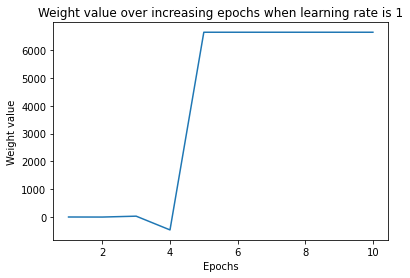

In [22]:
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
print(W)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value)
plt.title('Weight value over increasing epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')